# Solvability of Filter Finder

Setup correct path and import required modules

In [13]:
%matplotlib inline
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [38]:
import tensorflow as tf
import src.model as models
import src.data as d
import src.metrics as metrics
import src.training as training
import src.helpers as helpers
import src.loss as loss
import src.visual as vis
import hyperparams
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Data

Load the data

In [179]:
search_file = ['search', 'search_gray','search_blur', 'search_blur_2', 'search_blur_3']
template_file = ['template', 'template_gray','template_blur', 'template_blur_2', 'template_blur_3']

In [180]:
n = len(search_file)
s = np.zeros((n,512, 512))
t = np.zeros((n,224, 224))

for i in range(n):
    s[i] = mpimg.imread('/FilterFinder/data/solvability/'+search_file[i]+'.png')[:,:,0]
    t[i] = mpimg.imread('/FilterFinder/data/solvability/'+template_file[0]+'.png')[:,:,0]

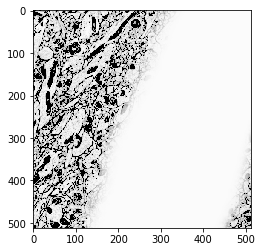

In [181]:
t = t*(t>0.5)
s = s*(s>0.5)
vis.show(s[4])

### Model

Load the model (just normxcorr)

In [182]:

sess = tf.InteractiveSession()

search = tf.placeholder(tf.float32, shape=[n, 512, 512])
template = tf.placeholder(tf.float32, shape=[n, 224, 224])
out = helpers.normxcorr2FFT(search, template)

result = sess.run(out, feed_dict={template: t, search: s})

### Run experiments

Feed experiments

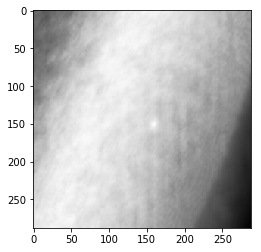

In [184]:
vis.show(result[4])